<a href="https://colab.research.google.com/github/Anweshasen98/Transfer-Learning-Using-VGG16-For-MNIST-Classifier/blob/main/Transfer_Learning_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning On MNIST dataset using VGG-16

In [ ]:
#Import Libraries
from keras.datasets import mnist  # imports the MNIST dataset from the keras.datasets module.
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16 #imports the VGG16 model from the keras.applications module.
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
from keras.utils import to_categorical
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn import metrics

%matplotlib inline

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# Convert grayscale images to RGB
X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)
(60000,)
(10000,)


In [ ]:
# Normalize the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
# Convert labels to categorical format

#y_train = to_categorical(y_train,10)
#y_test = to_categorical(y_test,10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)
(60000,)
(10000,)


In [ ]:
#resize the images in the X_train and X_test array to 32x32 from 28x28
#using PIL library

#from PIL import Image

#X_train = np.array([np.array(Image.fromarray(im.squeeze()).resize((32,32))) for im in X_train])
#X_test = np.array([np.array(Image.fromarray(im.squeeze()).resize((32,32))) for im in X_test])

 #Resize the images using TensorFlow

import tensorflow as tf
X_train = tf.image.resize(X_train, (32, 32),method='nearest')
X_test = tf.image.resize(X_test, (32, 32),method='nearest')

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)
(60000,)
(10000,)


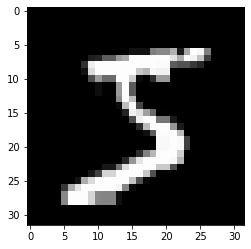

In [ ]:
plt.imshow(X_train[0])

# LOAD VGG 16 Pre Trained Model

In [ ]:
# Load the VGG16 model and remove the final fully connected layers
vgg16 = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(32, 32, 3))

output = vgg16.layers[-1].output
#output= GlobalAveragePooling2D()(output)


output = Flatten()(output)

vgg16 = Model(vgg16.input, output)

In [ ]:
# Freeze the layers of pre-trained model
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# Add new fully connected layers for the MNIST dataset

x = vgg16.output
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

#Dropout layers are added to the model, which randomly
#drops out a certain percentage of neurons during training to prevent overfitting.

In [ ]:
# Define the full model
model = Model(inputs=vgg16.input, outputs=x)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

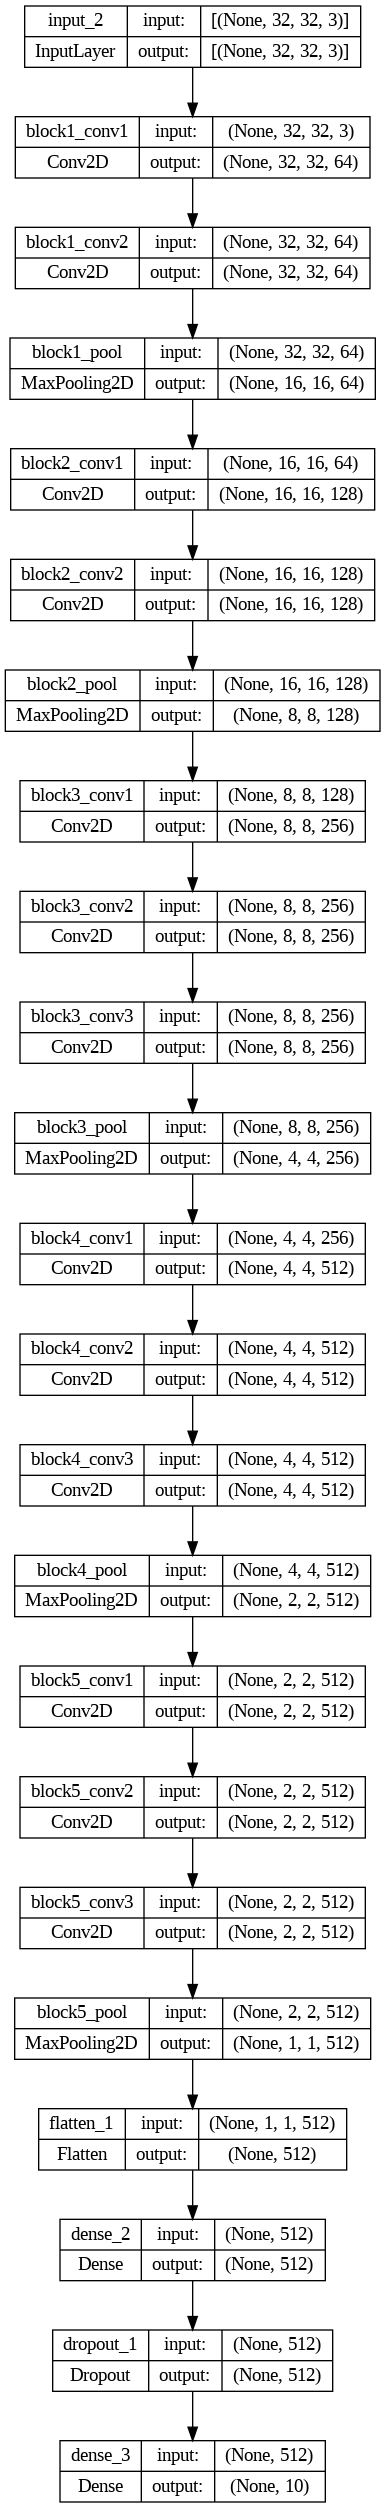

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model,'model.png', show_shapes=True, show_layer_names=True)

In [ ]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")> ACCURACY_THRESHOLD):
      print("\nReached %2.2f%% accuracy so cancelling training!" % (ACCURACY_THRESHOLD*100))
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
# Compile the model

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
ACCURACY_THRESHOLD =  .99

training = model.fit(X_train, y_train, epochs=100, batch_size= 32 , validation_split=0.1, callbacks=[callbacks])



Epoch 1/100
1688/1688 [==============================] - 18s 10ms/step - loss: 0.3832 - accuracy: 0.8772 - val_loss: 0.1682 - val_accuracy: 0.9482
Epoch 2/100
1688/1688 [==============================] - 18s 10ms/step - loss: 0.2003 - accuracy: 0.9345 - val_loss: 0.1291 - val_accuracy: 0.9577
Epoch 3/100
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1716 - accuracy: 0.9433 - val_loss: 0.1099 - val_accuracy: 0.9640
Epoch 4/100
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1579 - accuracy: 0.9476 - val_loss: 0.0983 - val_accuracy: 0.9710
Epoch 5/100
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1460 - accuracy: 0.9516 - val_loss: 0.0958 - val_accuracy: 0.9680
Epoch 6/100
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1380 - accuracy: 0.9543 - val_loss: 0.0940 - val_accuracy: 0.9688
Epoch 7/100
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1316 - accuracy: 0.9565 - val_loss: 0

# PERFORMANCE EVALUATION

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss : {loss}, \nAccuracy: {accuracy}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0937 - accuracy: 0.9793
Loss : 0.09368973970413208, 
Accuracy: 0.9793000221252441


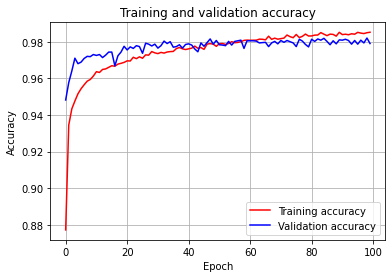

<Figure size 432x288 with 0 Axes>

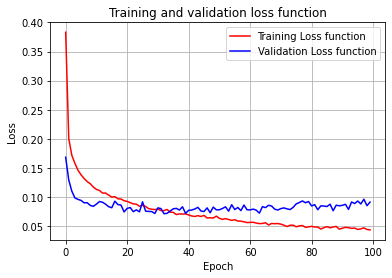

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Training and Testing curves

import matplotlib.pyplot as plt

history = training.history

def summarize_diagnostics(history):
  acc = history['accuracy']
  loss = history['loss']
  val_acc = history['val_accuracy']
  val_loss = history['val_loss']

  epochs = range(len(acc))


  plt.grid()
  plt.plot(acc, 'r', label='Training accuracy')
  plt.plot(val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.figure()
  plt.show()

  plt.grid()
  plt.plot(loss, 'r', label='Training Loss function')
  plt.plot(val_loss, 'b', label='Validation Loss function')
  plt.title('Training and validation loss function')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.figure()
  plt.show()


summarize_diagnostics(history)

In [ ]:
#PREDICT

classification = model.predict(X_test)
classification[0]

313/313 [==============================] - 3s 8ms/step


array([1.9185299e-35, 2.8109844e-23, 2.5191703e-18, 1.9123298e-24,
       2.9162772e-24, 1.4010333e-18, 1.0259430e-37, 1.0000000e+00,
       2.9099079e-18, 2.6380993e-22], dtype=float32)

In [ ]:
y_pred = []

for i in classification:
    y_pred.append(np.argmax(i))

y_pred[:5]

[7, 2, 1, 0, 4]

In [ ]:
pred=[np.argmax(i) for i in classification]

pred[ :5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(y_test, pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    0,    2,    3,    4,    0,    2,    1],
       [   0, 1131,    0,    1,    0,    1,    1,    0,    1,    0],
       [   1,    0, 1019,    0,    2,    2,    0,    2,    5,    1],
       [   0,    0,   12,  974,    0,   16,    0,    2,    6,    0],
       [   0,    3,    5,    0,  959,    0,    1,    1,    6,    7],
       [   3,    1,    6,   11,    1,  864,    1,    1,    3,    1],
       [   2,    3,    5,    0,    2,    4,  941,    0,    0,    1],
       [   0,    6,   11,    2,    5,    1,    0, 1000,    1,    2],
       [   0,    0,    5,    1,    3,    0,    1,    1,  961,    2],
       [   2,    1,    4,    1,    8,    2,    0,    6,    8,  977]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

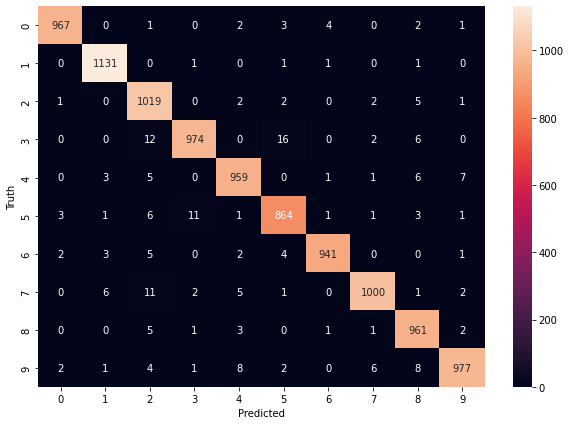

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# End of Task 1c Part 1